In [130]:
import pandas as pd

weather_data = pd.read_csv(r'/content/To_Store_Data.CSV')
FE = pd.read_csv(r'/content/FE_hourly.csv').set_index('Datetime')

In [131]:
weather_data

,FE_MW,humidity,precipation,max_temp,min_temp,wind_speed
0,208083.0,68.31,2.72,73.16,64.18,7.56
1,185818.0,46.85,0.27,84.20,59.50,10.84
2,176788.0,39.14,0.00,89.32,61.94,10.35
3,180699.0,26.81,0.00,92.35,61.54,9.42
4,188311.0,27.82,0.05,91.73,67.23,13.71
...,...,...,...,...,...,...
2616,193863.0,74.00,0.00,74.91,61.56,8.34
2617,195607.0,67.00,0.00,84.65,60.39,11.45
2618,196392.0,56.00,0.00,88.48,64.58,8.34
2619,205674.0,49.00,0.37,87.04,66.56,8.10


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y_train = weather_data['FE_MW'].iloc[:1407]
y_test = weather_data['FE_MW'].iloc[1407:]
X_train = weather_data.reset_index().drop(columns = 'FE_MW').iloc[:1407]
X_test = weather_data.reset_index().drop(columns = 'FE_MW').iloc[1407:]



In [133]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [134]:
X_test

,index,humidity,precipation,max_temp,min_temp,wind_speed
1407,1407,30.0,0.00,71.49,45.54,8.86
1408,1408,42.0,0.00,68.65,52.14,12.19
1409,1409,37.0,0.00,74.28,49.80,10.16
1410,1410,28.0,0.00,76.84,48.43,6.02
1411,1411,26.0,0.00,76.82,51.33,7.99
...,...,...,...,...,...,...
2616,2616,74.0,0.00,74.91,61.56,8.34
2617,2617,67.0,0.00,84.65,60.39,11.45
2618,2618,56.0,0.00,88.48,64.58,8.34
2619,2619,49.0,0.37,87.04,66.56,8.10


In [149]:
import keras
from keras import layers

model = keras.Sequential()

model.add(layers.Input((6,)))

model.add(layers.Dense(32, activation = 'linear'))

model.add(layers.Dense(64, activation = 'linear'))

model.add(layers.Dense(1))

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.01))

In [151]:
fit_model = model.fit(
    X_train_scaled,
    y_train,
    epochs = 200,
    validation_split = .2,
)

Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 36344459264.0000 - val_loss: 37336543232.0000
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35397640192.0000 - val_loss: 37859815424.0000
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34525044736.0000 - val_loss: 39628611584.0000
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30120146944.0000 - val_loss: 42893070336.0000
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21846958080.0000 - val_loss: 45126049792.0000
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13923859456.0000 - val_loss: 40371310592.0000
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7712682496.0000 - val_loss: 28564828160.0000
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4459482624.0000 - val_loss: 16196633600.0000
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2533873408.0000 - val_loss: 8409755136.0000
Epoch 10/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [152]:
model.evaluate(X_test_scaled, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 582749696.0000 


616806464.0

In [153]:
train_predictions = model.predict(X_train_scaled)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [154]:
predictions = model.predict(X_test_scaled)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [155]:
history_df = pd.DataFrame(fit_model.history)

<Axes: >

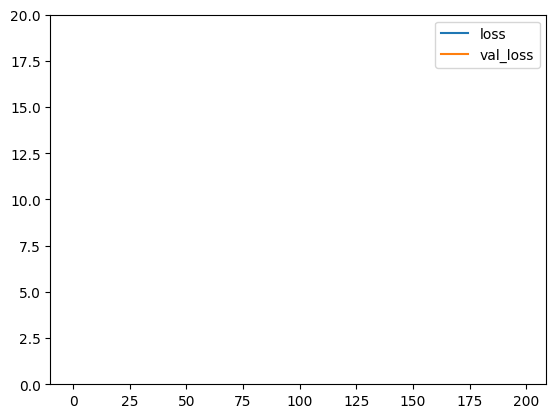

In [156]:
history_df.plot(ylim=(0,20))

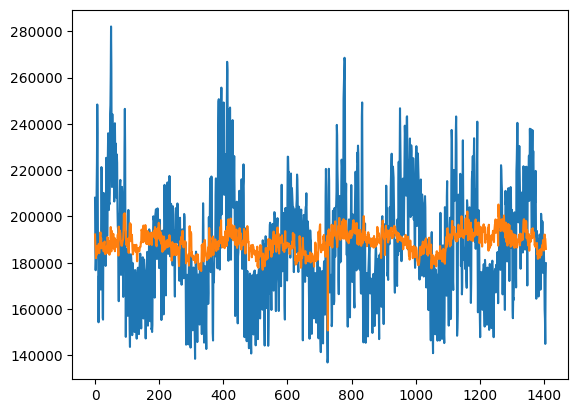

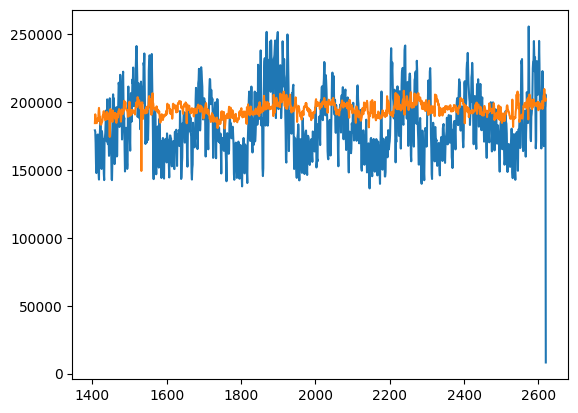

In [157]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(weather_data.iloc[:1407].index,y_train)
ax.plot(weather_data.iloc[:1407].index,train_predictions)

fig, ax2 = plt.subplots()
ax2.plot(weather_data.iloc[1407:].index,y_test)
ax2.plot(weather_data.iloc[1407:].index,predictions)
plt.show()